In [7]:
# import three pickle files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df319 = pd.read_pickle('A319_final.pkl')
df320 = pd.read_pickle('A320_final.pkl')
df321 = pd.read_pickle('A321_final.pkl')
df332 = pd.read_pickle('A332_final.pkl')




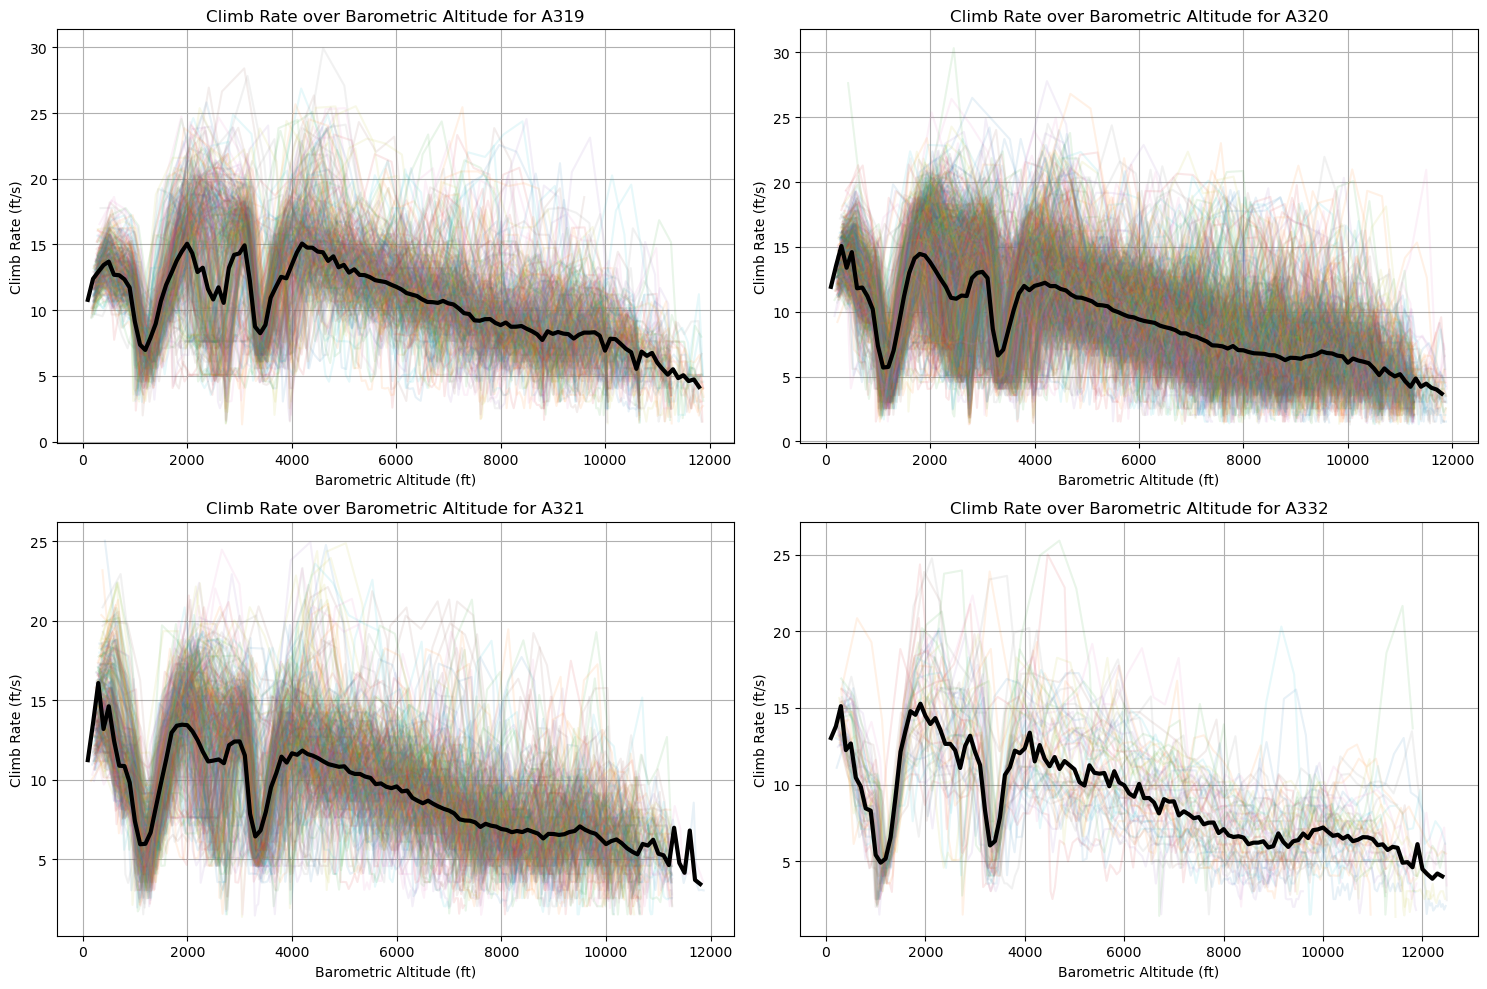

In [ ]:
# Calculate climb rate for each dataframe by taking the difference in baroaltitude over time (15 seconds)
df319['climb_rate'] = df319.groupby('segment')['baroaltitude'].diff() / 15
df320['climb_rate'] = df320.groupby('segment')['baroaltitude'].diff() / 15
df321['climb_rate'] = df321.groupby('segment')['baroaltitude'].diff() / 15
df332['climb_rate'] = df332.groupby('segment')['baroaltitude'].diff() / 15

# Define a function to plot climb rate vs barometric altitude for each segment and the average climb rate
def plot_climb_rate_vs_baroaltitude(ax, df, name):
    # Plot climb rate for each segment
    for segment, group in df.groupby('segment'):
        ax.plot(group['baroaltitude'], group['climb_rate'], alpha=0.1, label=f'Segment {segment}')
    # Set axis labels and title
    ax.set_xlabel('Barometric Altitude (ft)')
    ax.set_ylabel('Climb Rate (ft/s)')
    ax.set_title('Climb Rate over Barometric Altitude for ' + name)
    # Calculate and plot the average climb rate for each 100m interval of baroaltitude
    df['baroaltitude_int'] = df['baroaltitude'] // 100 * 100
    df_avg_climb_rate = df.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
    ax.plot(df_avg_climb_rate['baroaltitude_int'], df_avg_climb_rate['climb_rate'], color='black', linestyle='-', linewidth=3, label='Average Climb Rate')
    # Add grid
    ax.grid(True)

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot climb rate vs barometric altitude for each aircraft model
plot_climb_rate_vs_baroaltitude(axs[0, 0], df319, 'A319')
plot_climb_rate_vs_baroaltitude(axs[0, 1], df320, 'A320')
plot_climb_rate_vs_baroaltitude(axs[1, 0], df321, 'A321')
plot_climb_rate_vs_baroaltitude(axs[1, 1], df332, 'A332')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


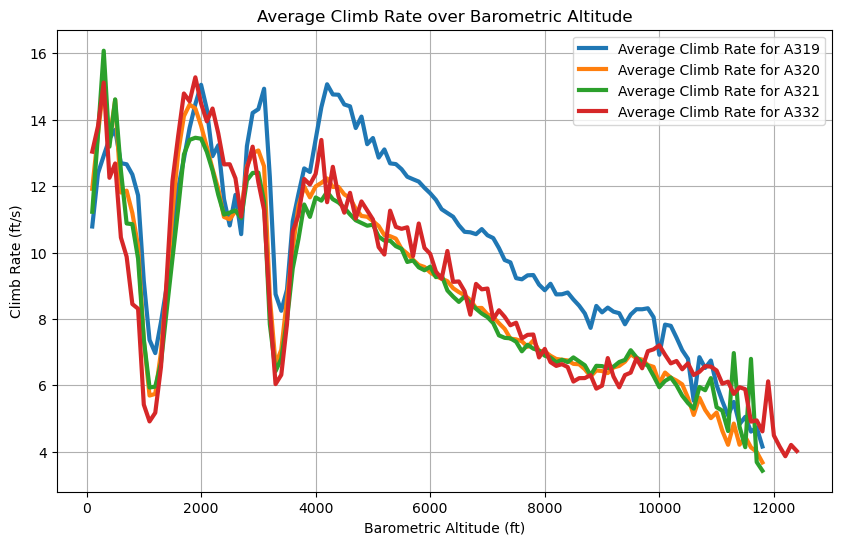

In [12]:
plt.figure(figsize=(10, 6))

# Plot the average climb rate for each 100m interval of baroaltitude for df319
df319['baroaltitude_int'] = df319['baroaltitude'] // 100 * 100
df319_avg_climb_rate = df319.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df319_avg_climb_rate['baroaltitude_int'], df319_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A319')

# Plot the average climb rate for each 100m interval of baroaltitude for df320
df320['baroaltitude_int'] = df320['baroaltitude'] // 100 * 100
df320_avg_climb_rate = df320.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df320_avg_climb_rate['baroaltitude_int'], df320_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A320')

# Plot the average climb rate for each 100m interval of baroaltitude for df321
df321['baroaltitude_int'] = df321['baroaltitude'] // 100 * 100
df321_avg_climb_rate = df321.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df321_avg_climb_rate['baroaltitude_int'], df321_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A321')

# Plot the average climb rate for each 100m interval of baroaltitude for df332
df332['baroaltitude_int'] = df332['baroaltitude'] // 100 * 100
df332_avg_climb_rate = df332.groupby('baroaltitude_int')['climb_rate'].mean().reset_index()
plt.plot(df332_avg_climb_rate['baroaltitude_int'], df332_avg_climb_rate['climb_rate'], linestyle='-', linewidth=3, label='Average Climb Rate for A332')
plt.xlabel('Barometric Altitude (ft)')
plt.ylabel('Climb Rate (ft/s)')
plt.title('Average Climb Rate over Barometric Altitude')
plt.grid(True)
plt.legend()
plt.show()